In [1]:
import pandas as pd

df= pd.read_csv("df_sell_final.csv")
df = df.drop(['Unnamed: 0', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis =1)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_count = pd.read_csv("df_sell_count.csv")

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.00,4.00,...,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
1,2011-01-30,0.00,0.0,0.00,0.00,0.00,0.00,0.00,30.00,0.00,...,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2,2011-01-31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14.00,...,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
3,2011-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,...,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
4,2011-02-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,5,2016,d_1940,No_Event,No_Event,No_Event,No_Event,0,0,0


In [4]:
single_df_linear = df.reset_index()
single_df_linear

single_df_linear = df.groupby(['event_name_1'])['d'].count().to_frame('event type')
event_name_list = pd.DataFrame()
event_name_list['event'] = single_df_linear.index

In [5]:
event_name_list

,event
0,Cultural
1,No_Event
2,Religious


In [6]:
single_df_linear = df.groupby(['event_type_1'])['d'].count().to_frame('event type')
event_type_list = pd.DataFrame()
event_type_list['event_type'] = single_df_linear.index
event_type_list

,event_type
0,Cultural
1,No_Event
2,Religious


In [7]:
single_df_linear = df.groupby(['weekday'])['d'].count().to_frame('Week days')
weekday_list = pd.DataFrame()
weekday_list['weekday'] = single_df_linear.index
weekday_list

,weekday
0,Friday
1,Monday
2,Saturday
3,Sunday
4,Thursday
5,Tuesday
6,Wednesday


In [8]:
import numpy as np
df['event_name_2_index'] = df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
df['event_type_1_index'] = df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
df['event_type_2_index'] = df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
df['weekday_index'] = df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [9]:
df = df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

Test to show with multiple items in 1 time serires graph

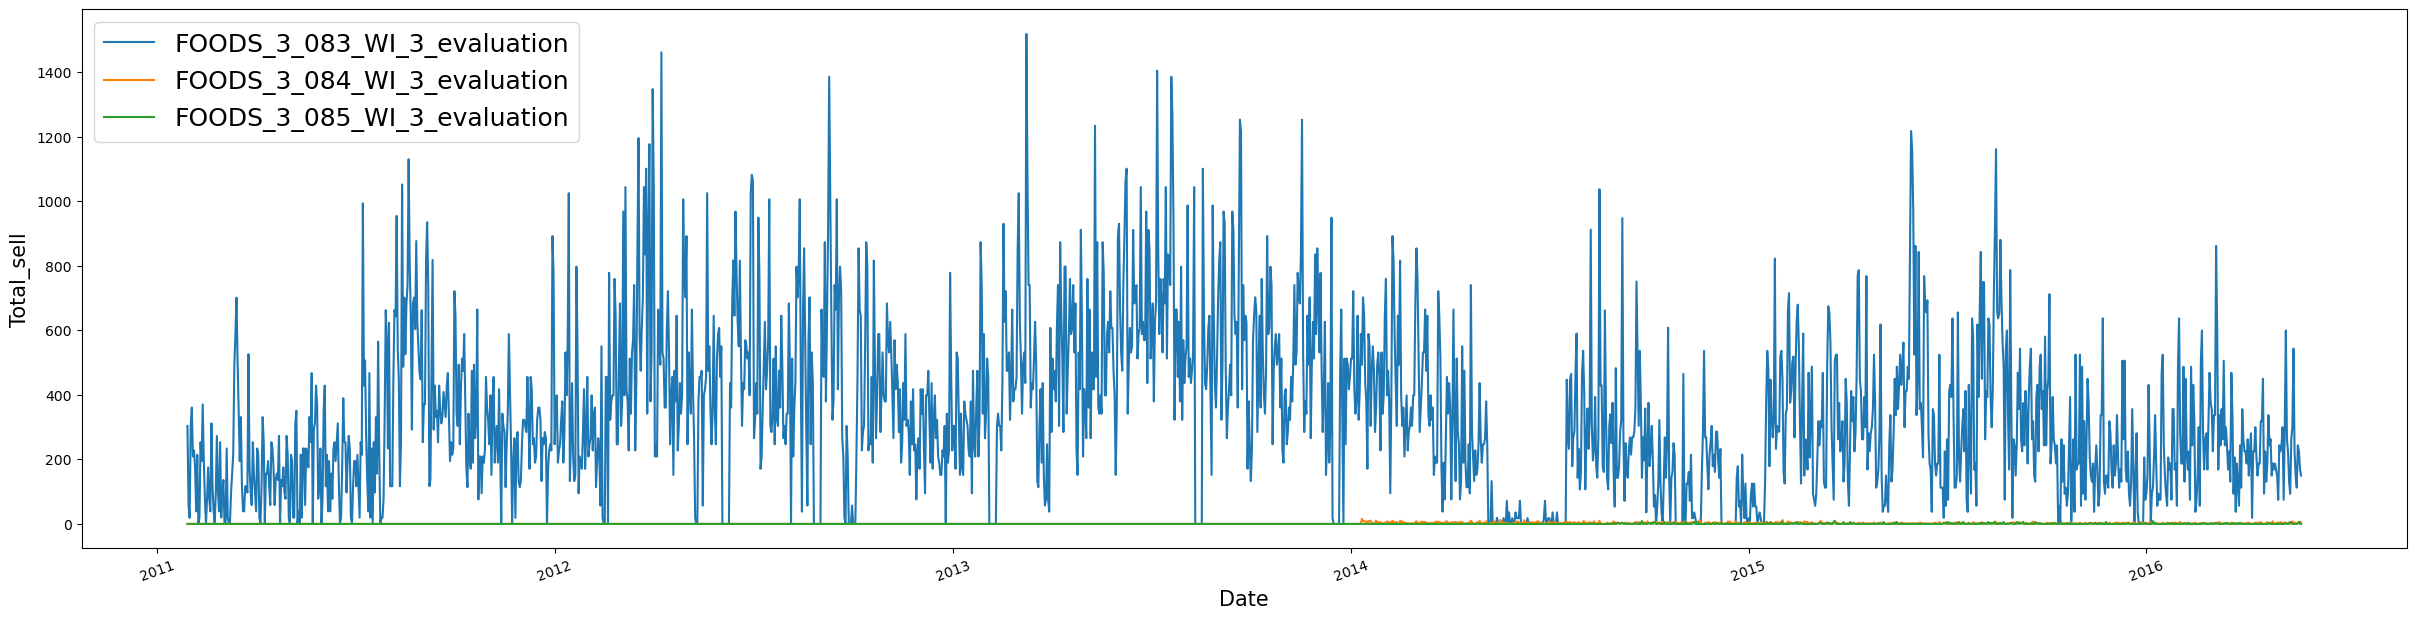

In [10]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

dim = (30,7)
plt.subplots(figsize = dim)

for item in multi_items:
    plt.plot(df['date'], df[item], label = item)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

Testing with short term

In [11]:
df_test = df.copy()
df_test = df_test.set_index('date')
df_test = df_test.loc['2016/04/01':,:]

In [12]:
WI = []
TX = []
CA = []
items = []
calender = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

create a list with all the stores

In [13]:
for col in df_test.columns:
    
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

In [14]:
eva_item =  "FOODS_3_083_WI_3_evaluation"
eva_df = df_test.loc[:,eva_item]

In [15]:
train = eva_df['2016/04/01':'2016/05/15']
test = eva_df['2016/05/16':]

In [16]:
test

date
2016-05-16    224.76
2016-05-17    149.84
2016-05-18    112.38
2016-05-19    243.49
2016-05-20    224.76
2016-05-21    168.57
2016-05-22    149.84
Name: FOODS_3_083_WI_3_evaluation, dtype: float64

Use autoarima

In [17]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.059 seconds


In [18]:
prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
prediction

2016-05-16    228.506
2016-05-17    228.506
2016-05-18    228.506
2016-05-19    228.506
2016-05-20    228.506
2016-05-21    228.506
2016-05-22    228.506
Freq: D, dtype: float64

In [41]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/Y_actual)*100
    return ape

In [42]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(APE(Y_actual, Y_Predicted))
    return mape

In [43]:
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
APE_df['APE'] = APE(test, prediction)
MAPE_df.loc[1] =[eva_item, MAPE(test, prediction)]

In [44]:
MAPE_df

,id,MAPE
1,FOODS_3_083_WI_3_evaluation,36.196581


In [45]:
cf= pd.DataFrame(confint)

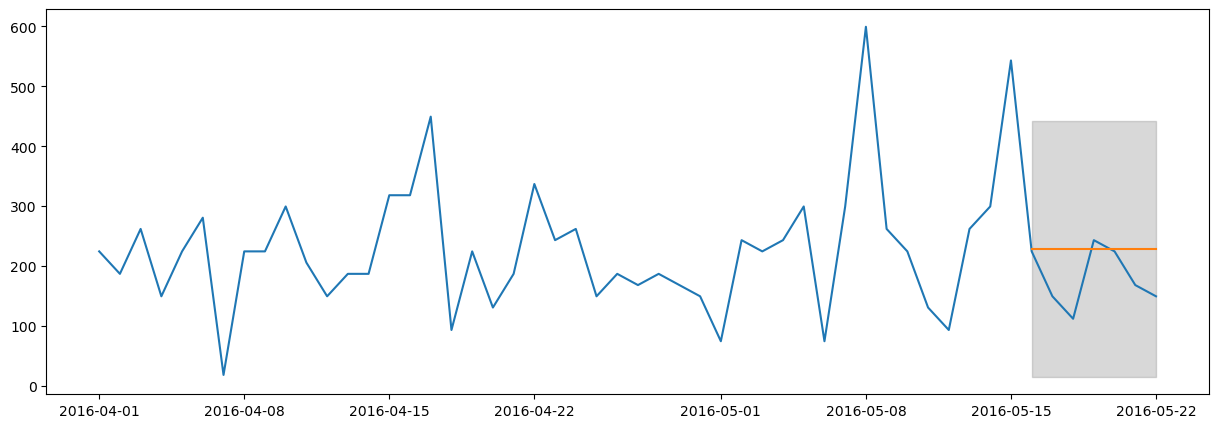

In [46]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [67]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/15':]

MAPE_APE_df = pd.DataFrame(columns =['id','APE','MAPE'])
#Create a actual value dataframe and predicted value data frame
actual_item = test_df.loc[:,multi_items]
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in multi_items:
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    APE_df[item] = APE(test, prediction)
    MAPE_df.loc[index_counter] =[eva_item, MAPE(test, prediction)]
    index_counter = index_counter +1
    forecast_column_name = f'{item}_predict'
    #create a column with store id
    split_name = item.split("_")
    selected_elements = [split_name[idx] for idx in joining_indices_store]
    store_id = "_".join(selected_elements)
    forecast_store_id = f'{store_id}_predict'
    if forecast_store_id in forecast_data:
        evaluating_data[forecast_store_id] = forecast_data[forecast_store_id] + prediction
    else:
        evaluating_data[forecast_store_id] = prediction
    
    selected_elements_item = [split_name[idx] for idx in joining_indices_item]
    store_item_id = "_".join(selected_elements_item)
    forecast_store_item_id = f'{store_item_id}_predict'
    if forecast_store_item_id in forecast_data:
        evaluating_data[forecast_store_item_id] = forecast_data[forecast_store_item_id] + prediction
    else:
        evaluating_data[forecast_store_item_id] = prediction
       
    if store_id in forecast_data:
        evaluating_data[store_id] = forecast_data[store_id] + test
    else:
        evaluating_data[store_id] = test
    
    selected_elements_item = [split_name[idx] for idx in joining_indices_item]
    store_item_id = "_".join(selected_elements_item)
    if store_item_id in forecast_data:
        evaluating_data[store_item_id] = forecast_data[store_item_id] + test
    else:
        evaluating_data[store_item_id] = test


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.074 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.063 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

In [69]:
evaluating_data

,WI_3_predict,WI_3_FOODS_3_predict,WI_3,WI_3_FOODS_3
2016-05-16,0.346279,0.346279,231.404279,231.404279
2016-05-17,0.393435,0.393435,231.451435,231.451435
2016-05-18,0.393435,0.393435,231.451435,231.451435
2016-05-19,0.393435,0.393435,234.431435,234.431435
2016-05-20,0.393435,0.393435,237.411435,237.411435
2016-05-21,0.393435,0.393435,231.451435,231.451435
2016-05-22,0.393435,0.393435,231.451435,231.451435
2016-05-23,0.393435,0.393435,NaN,NaN


ValueError: operands could not be broadcast together with shapes (8,) (7,) 

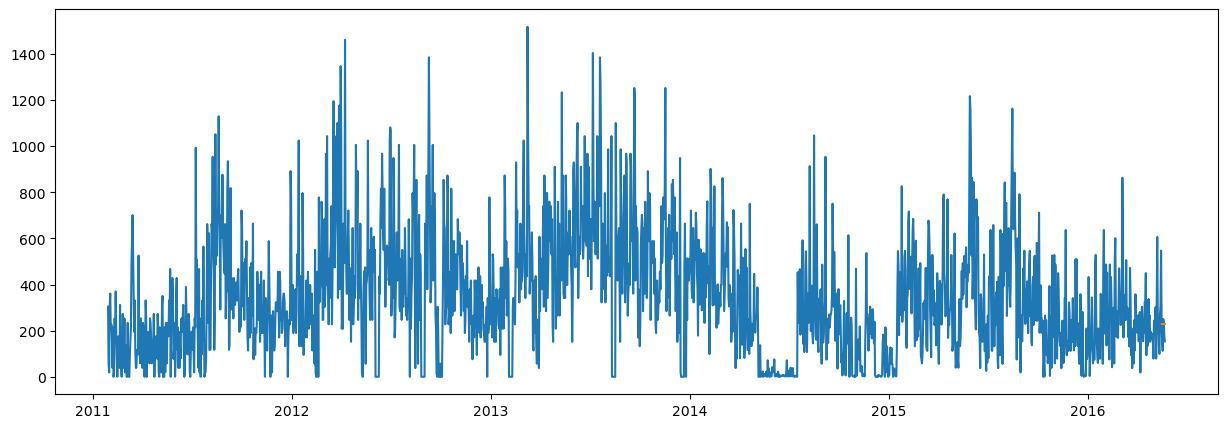

In [56]:
prediction_series = pd.Series(df_test2['predicted_total'],index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test2['actual_total'])
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [51]:
APE_df

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation
2016-05-15,NaN,NaN,NaN
2016-05-16,1.666667,35.555556,inf
2016-05-17,52.500000,inf,inf
2016-05-18,103.333333,inf,inf
2016-05-19,6.153846,35.555556,86.797490
2016-05-20,1.666667,35.555556,93.398745
2016-05-21,35.555556,57.037037,inf
2016-05-22,52.500000,35.555556,inf
2016-05-23,NaN,NaN,NaN


In [39]:
#Cerate a list of items from current table
items = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)

#df_test = df_test.loc['2015/01/01':'2016/01/01',:]
#train_df = df['2015/01/01':'2016/01/01']
#test_df = df['2016/05/15':]
df_test = df.set_index('date')
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])


#Create a loop of forecast
for single in items:
    train = df_test.loc['2015/01/01':'2016/01/01',single]
    #Auto ARIMA on the train table of single product
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=12, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    APE_df['APE'] = APE(items, prediction)
    MAPE_df.loc[1] =[eva_item, MAPE(items, prediction)]

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1483.618, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1484.642, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1484.748, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1642.811, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1485.134, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1485.147, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1487.602, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1482.888, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1484.645, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1486.838, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1484.851, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1484.879, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1483.013, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1485.186, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0

C:\Users\yohei\anaconda3\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1855.725, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1780.861, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1782.156, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1782.594, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1780.673, Time=0.06 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1782.433, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1783.257, Time=0.42 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1856.112, Time=0.05 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1751.748, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1750.214, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1751.786, Time=0.09 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1753.630, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1721.264, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1723.227, Time=0.11 sec


KeyboardInterrupt: 

In [35]:
c = df_test.loc['2015/01/01':'2016/01/01','FOODS_1_001_CA_2_evaluation']

In [37]:
c

date
2015-01-01    0.0
2015-01-02    0.0
2015-01-03    0.0
2015-01-04    0.0
2015-01-05    0.0
             ... 
2015-12-28    0.0
2015-12-29    0.0
2015-12-30    0.0
2015-12-31    0.0
2016-01-01    0.0
Name: FOODS_1_001_CA_2_evaluation, Length: 366, dtype: float64

In [31]:
c

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,wday,month,year,snap_CA,snap_TX,snap_WI,event_name_2_index,event_type_1_index,event_type_2_index,weekday_index


In [ ]:

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'CA'):
            items.append(col)